<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Общее-впечатление" data-toc-modified-id="Общее-впечатление-0.1"><span class="toc-item-num">0.1&nbsp;&nbsp;</span><font color="orange">Общее впечатление</font></a></span></li><li><span><a href="#Общее-впечатление-(ревью-2)" data-toc-modified-id="Общее-впечатление-(ревью-2)-0.2"><span class="toc-item-num">0.2&nbsp;&nbsp;</span><font color="orange">Общее впечатление (ревью 2)</font></a></span></li><li><span><a href="#Общее-впечатление-(ревью-3)" data-toc-modified-id="Общее-впечатление-(ревью-3)-0.3"><span class="toc-item-num">0.3&nbsp;&nbsp;</span><font color="orange">Общее впечатление (ревью 3)</font></a></span></li></ul></li><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span></li><li><span><a href="#Исследование-задачи" data-toc-modified-id="Исследование-задачи-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Исследование задачи</a></span><ul class="toc-item"><li><span><a href="#LogisticRegression" data-toc-modified-id="LogisticRegression-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>LogisticRegression</a></span></li><li><span><a href="#RandomForestClassifier" data-toc-modified-id="RandomForestClassifier-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>RandomForestClassifier</a></span></li></ul></li><li><span><a href="#Борьба-с-дисбалансом" data-toc-modified-id="Борьба-с-дисбалансом-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Борьба с дисбалансом</a></span></li><li><span><a href="#Тестирование-модели" data-toc-modified-id="Тестирование-модели-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Тестирование модели</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

# Отток клиентов

Из «Бета-Банка» стали уходить клиенты. Каждый месяц. Немного, но заметно. Банковские маркетологи посчитали: сохранять текущих клиентов дешевле, чем привлекать новых.

Нужно спрогнозировать, уйдёт клиент из банка в ближайшее время или нет. Вам предоставлены исторические данные о поведении клиентов и расторжении договоров с банком. 

Постройте модель с предельно большим значением *F1*-меры. Чтобы сдать проект успешно, нужно довести метрику до 0.59. Проверьте *F1*-меру на тестовой выборке самостоятельно.

Дополнительно измеряйте *AUC-ROC*, сравнивайте её значение с *F1*-мерой.

Источник данных: [https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling](https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.utils import shuffle

from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score, roc_curve

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

## Подготовка данных

In [2]:
df = pd.read_csv('/datasets/Churn.csv')

In [3]:
df.head()

RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0     2.0       0.00              1          1               1   
1     1.0   83807.86              1          0               1   
2     8.0  159660.80              3          1               0   
3     1.0       0.00              2          0               0   
4     2.0  125510.82              1          1               1   

   EstimatedSalary  Exited  
0        101348.88       1  
1        112542.58       0  
2        113931.57       1  
3         93826.63       0  
4         79084.10       0

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
RowNumber          10000 non-null int64
CustomerId         10000 non-null int64
Surname            10000 non-null object
CreditScore        10000 non-null int64
Geography          10000 non-null object
Gender             10000 non-null object
Age                10000 non-null int64
Tenure             9091 non-null float64
Balance            10000 non-null float64
NumOfProducts      10000 non-null int64
HasCrCard          10000 non-null int64
IsActiveMember     10000 non-null int64
EstimatedSalary    10000 non-null float64
Exited             10000 non-null int64
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


Есть пропуски в столбце 'Tenure', предлагаю убрать данные с пропусками, дабы не "вставлять палки" при обучении модели, или же заменить средним значением / медианой.

Думаю второй вариант погуманнее.

Также не помешало бы перевести значения данного столбца в формат int64.

In [5]:
print('Медиана датасета по столбцу Tenure:', df['Tenure'].median())
print('Среднее датасета по столбцу Tenure:', df['Tenure'].mean())

Медиана датасета по столбцу Tenure: 5.0
Среднее датасета по столбцу Tenure: 4.997690023099769


In [6]:
df['Tenure'] = df['Tenure'].fillna(df['Tenure'].median())
df['Tenure'] = df['Tenure'].astype('int64')

Переведем все столбцы, где есть тип данных float64 в int64.

In [7]:
df['RowNumber'] = df['RowNumber'].astype('int64')
df['CustomerId'] = df['CustomerId'].astype('int64')
df['CreditScore'] = df['CreditScore'].astype('int64')
df['Age'] = df['Age'].astype('int64')
df['NumOfProducts'] = df['NumOfProducts'].astype('int64')
df['HasCrCard'] = df['HasCrCard'].astype('int64')
df['IsActiveMember'] = df['IsActiveMember'].astype('int64')
df['Exited'] = df['Exited'].astype('int64')

Предобработка данных завершена!

Какие столбики нам не нужны?

Столбик с индексом, фамилия, местоположение, айди клиента...

Какая разница как кого зовут и где находится, если есть остальные данные, на основе которых и надо обучать модель

In [8]:
numeric = ['CreditScore', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary']

In [9]:
df.head()

RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2       0.00              1          1               1   
1       1   83807.86              1          0               1   
2       8  159660.80              3          1               0   
3       1       0.00              2          0               0   
4       2  125510.82              1          1               1   

   EstimatedSalary  Exited  
0        101348.88       1  
1        112542.58       0  
2        113931.57       1  
3         93826.63       0  
4         79084.10       0

Gender надо перевести в численный вид, используем метод прямого кодирования.

In [10]:
df['Gender'] = pd.get_dummies(df['Gender'], drop_first=True)

In [11]:
df

RowNumber  CustomerId    Surname  CreditScore Geography  Gender  Age  \
0             1    15634602   Hargrave          619    France       0   42   
1             2    15647311       Hill          608     Spain       0   41   
2             3    15619304       Onio          502    France       0   42   
3             4    15701354       Boni          699    France       0   39   
4             5    15737888   Mitchell          850     Spain       0   43   
...         ...         ...        ...          ...       ...     ...  ...   
9995       9996    15606229   Obijiaku          771    France       1   39   
9996       9997    15569892  Johnstone          516    France       1   35   
9997       9998    15584532        Liu          709    France       0   36   
9998       9999    15682355  Sabbatini          772   Germany       1   42   
9999      10000    15628319     Walker          792    France       0   28   

      Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0          2       0.00              1          1               1   
1          1   83807.86              1          0               1   
2          8  159660.80              3          1               0   
3          1       0.00              2          0               0   
4          2  125510.82              1          1               1   
...      ...        ...            ...        ...             ...   
9995       5       0.00              2          1               0   
9996      10   57369.61              1          1               1   
9997       7       0.00              1          0               1   
9998       3   75075.31              2          1               0   
9999       5  130142.79              1          1               0   

      EstimatedSalary  Exited  
0           101348.88       1  
1           112542.58       0  
2           113931.57       1  
3            93826.63       0  
4            79084.10       0  
...               ...     ...  
9995         96270.64       0  
9996        101699.77       0  
9997         42085.58       1  
9998         92888.52       1  
9999         38190.78       0  

[10000 rows x 14 columns]

Теперь у нас столбик с Gender количественное значение (male - 1, female - 0)

Необходимо масштабирование признаков, дабы сделать так, чтобы все признаки были равнозначны.

Так как мы уже удалили все неколичественные признаки, которые, по сути, нам не нужны, нет смысла создавать отдельно колонку numeric, ибо у нас все numeric.

In [12]:
df = df.drop(['CustomerId', 'Surname', 'RowNumber', 'Geography'], axis = 1)

In [13]:
target = df['Exited']
features = df.drop(['Exited'] , axis=1)
features_train, features_temp, target_train, target_temp = train_test_split(features, target, test_size=0.5, random_state = 12345)
features_valid, features_test, target_valid, target_test = train_test_split(features_temp, target_temp, test_size=0.5, random_state = 12345)

In [14]:
scaler = StandardScaler()

features_train[numeric] = scaler.fit_transform(features_train[numeric])
features_valid[numeric] = scaler.transform(features_valid[numeric])
features_test[numeric] = scaler.transform(features_test[numeric])


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/conda/lib/python3.7/site-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_inde

In [15]:
print(features_train[numeric].shape)
print(features_valid[numeric].shape)
print(features_test[numeric].shape)

(5000, 9)
(2500, 9)
(2500, 9)


Далее уже будем использовать масштабированный df

## Исследование задачи

### LogisticRegression

Построим и исследуем матрицу ошибок на основе LogisticRegression



In [16]:
model = LogisticRegression(random_state=12345, solver='liblinear')
model.fit(features_train, target_train)
predicted_valid = model.predict(features_valid)

print('Матрица ошибок:')
print(confusion_matrix(target_valid, predicted_valid))
print()
print('Полнота:', recall_score(target_valid, predicted_valid))
print('Точность:', precision_score(target_valid, predicted_valid))
print('F1', f1_score(target_valid, predicted_valid))

Матрица ошибок:
[[1908   84]
 [ 416   92]]

Полнота: 0.18110236220472442
Точность: 0.5227272727272727
F1 0.26900584795321636


In [17]:
model = LogisticRegression(random_state=12345, solver='liblinear', class_weight='balanced')
model.fit(features_train, target_train)
predicted_valid = model.predict(features_valid)
print("F1 после взвешивания классов:", f1_score(target_valid, predicted_valid))

F1 после взвешивания классов: 0.45647703906785464


In [18]:
def upsample(features, target, repeat):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)
    
    features_upsampled, target_upsampled = shuffle(features_upsampled, target_upsampled, random_state=12345)
    
    return features_upsampled, target_upsampled

k = 0
for i in range(1, 40):
    features_upsampled, target_upsampled = upsample(features_train, target_train, i)

    model = LogisticRegression(solver='liblinear', random_state = 12345, class_weight='balanced')
    model.fit(features_upsampled, target_upsampled)

    predicted_valid = model.predict(features_valid)
    
    zxc = f1_score(target_valid, predicted_valid)
    if k < zxc:
        k = zxc


print("F1 лучшая после оптимизации выборки (увеличения):", k)

F1 лучшая после оптимизации выборки (увеличения): 0.45647703906785464


In [19]:
def downsample(features, target, fraction):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_downsampled = pd.concat(
        [features_zeros.sample(frac=fraction, random_state=12345)] + [features_ones])
    target_downsampled = pd.concat(
        [target_zeros.sample(frac=fraction, random_state=12345)] + [target_ones])
    
    features_downsampled, target_downsampled = shuffle(
        features_downsampled, target_downsampled, random_state=12345)
    
    return features_downsampled, target_downsampled

features_downsampled, target_downsampled = downsample(features_train, target_train, 0.1)

model = LogisticRegression(solver='liblinear', random_state = 12345)
model.fit(features_downsampled, target_downsampled)
predicted_valid = model.predict(features_valid)

print("F1 лучшая после оптимизации выборки (уменьшения):", f1_score(target_valid, predicted_valid))

F1 лучшая после оптимизации выборки (уменьшения): 0.3965217391304347


### RandomForestClassifier

Построим и исследуем матрицу ошибок на основе RandomForestClassifier


In [20]:
model = RandomForestClassifier(random_state=12345)
model.fit(features_train, target_train)
predicted_valid = model.predict(features_valid)

print('Матрица ошибок:')
print(confusion_matrix(target_valid, predicted_valid))
print()
print('Полнота:', recall_score(target_valid, predicted_valid))
print('Точность:', precision_score(target_valid, predicted_valid))
print('F1', f1_score(target_valid, predicted_valid))

Матрица ошибок:
[[1906   86]
 [ 308  200]]

Полнота: 0.3937007874015748
Точность: 0.6993006993006993
F1 0.5037783375314862


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [21]:
model = RandomForestClassifier(random_state=12345, class_weight='balanced')
model.fit(features_train, target_train)
predicted_valid = model.predict(features_valid)
print("F1 после взвешивания классов:", f1_score(target_valid, predicted_valid))

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


F1 после взвешивания классов: 0.49489795918367346


Уточняем наиболее оптимальные параметры для данной модели... (с учетом оптимизации выборки)

In [22]:
def upsample(features, target, repeat):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)
    
    features_upsampled, target_upsampled = shuffle(features_upsampled, target_upsampled, random_state=12345)
    
    return features_upsampled, target_upsampled

k = 0
for krat in range(1, 11):
    for kol in range(1, 11):
        for glub in range(1, 11):
            features_upsampled, target_upsampled = upsample(features_train, target_train, krat)

            model = RandomForestClassifier(n_estimators = kol, max_depth = glub, random_state = 12345, class_weight='balanced')
            model.fit(features_upsampled, target_upsampled)
            predicted_valid = model.predict(features_valid)
            zxc = f1_score(target_valid, predicted_valid)
            if zxc > k:
                kolich = kol
                glubina = glub
                kratnost = krat
                k = zxc

print('Во сколько раз увеличение:', kratnost)
print('Количество деревьев в лесу:', kolich)
print('Максимальная глубина дерева:', glubina)
print("F1 лучшая после оптимизации выборки (увеличения):", k)

Во сколько раз увеличение: 2
Количество деревьев в лесу: 10
Максимальная глубина дерева: 7
F1 лучшая после оптимизации выборки (увеличения): 0.5831842576028622


## Борьба с дисбалансом

Для борьбы с дисбалансом мы использовали скаляризацию и параметр class_weight='balanced'.

## Тестирование модели

Итого, так выглядит модель и такой результат F1...

In [23]:
features_upsampled, target_upsampled = upsample(features_train, target_train, 4)
model = RandomForestClassifier(n_estimators = 5, max_depth = 5, random_state = 12345, class_weight='balanced')
model.fit(features_upsampled, target_upsampled)
predicted_test = model.predict(features_test)
print('F1 полученной модели:', f1_score(target_test, predicted_test))

F1 полученной модели: 0.6024518388791594


AUC-ROC

AUC-ROC 0.8454721773398435
Метрика F1 0.6024518388791594


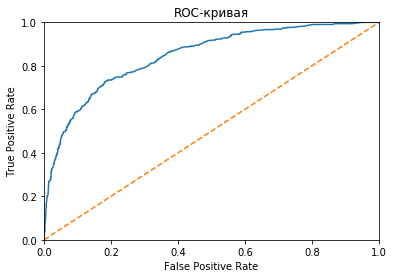

In [24]:
probabilities_test = model.predict_proba(features_test)
probabilities_one_test = probabilities_test[:, 1]
fpr, tpr, thresholds = roc_curve(target_test, probabilities_one_test)

print('AUC-ROC', roc_auc_score(target_test, probabilities_one_test))
print('Метрика F1', f1_score(target_test, predicted_test))

plt.figure()
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], linestyle = '--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая')
plt.show()

**ОБЩИЙ ВЫВОД**

Получена модель, AUC-ROC которой больше 0.5, а значит больше, чем у случайной выборки.

Визуально ROC-кривая находится выше кривой 0.5, тем самым мы получили рабочую модель.

## Чек-лист готовности проекта

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  Jupyter Notebook открыт
- [ ]  Весь код выполняется без ошибок
- [ ]  Ячейки с кодом расположены в порядке исполнения
- [ ]  Выполнен шаг 1: данные подготовлены
- [ ]  Выполнен шаг 2: задача исследована
    - [ ]  Исследован баланс классов
    - [ ]  Изучены модели без учёта дисбаланса
    - [ ]  Написаны выводы по результатам исследования
- [ ]  Выполнен шаг 3: учтён дисбаланс
    - [ ]  Применено несколько способов борьбы с дисбалансом
    - [ ]  Написаны выводы по результатам исследования
- [ ]  Выполнен шаг 4: проведено тестирование
- [ ]  Удалось достичь *F1*-меры не менее 0.59
- [ ]  Исследована метрика *AUC-ROC*